
Improved Model Accuracy: 40.00%

Welcome to the Healthcare Assistant


Enter your name:  amsin
Enter your age:  24
Preferred language code (en/ta/hi):  ta
Enter your symptoms (comma-separated):  fever, cough
Fever duration in days (1-7):  3
Temperature on Day 1 (°F):  100
Temperature on Day 2 (°F):  101
Temperature on Day 3 (°F):  101


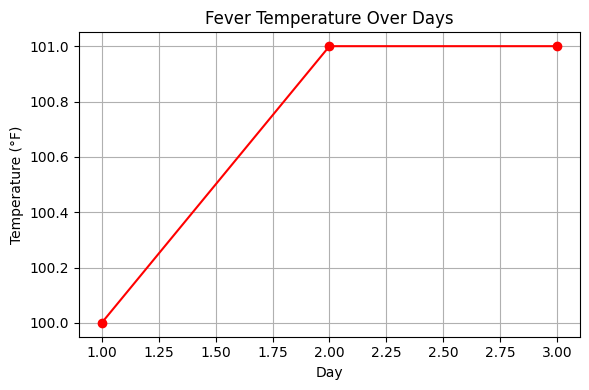

amsin, you may have: FOOD POISONING
Info: Food poisoning is caused by contaminated food.

Treatments:
- fever: Take paracetamol and rest.
- cough: Use cough syrup and drink warm fluids.

Recommended Diet:
- Bananas
- Toast
- Rice

Translated Message:
AMSIN, உங்களிடம் இருக்கலாம்: உணவு விஷம்
தகவல்: அசுத்தமான உணவால் உணவு விஷம் ஏற்படுகிறது.

சிகிச்சைகள்:
- காய்ச்சல்: பாராசிட்டமால் எடுத்து ஓய்வெடுங்கள்.
- இருமல்: இருமல் சிரப் பயன்படுத்தவும், சூடான திரவங்களை குடிக்கவும்.

பரிந்துரைக்கப்பட்ட உணவு:
- வாழைப்பழங்கள்
- சிற்றுண்டி
- அரிசி


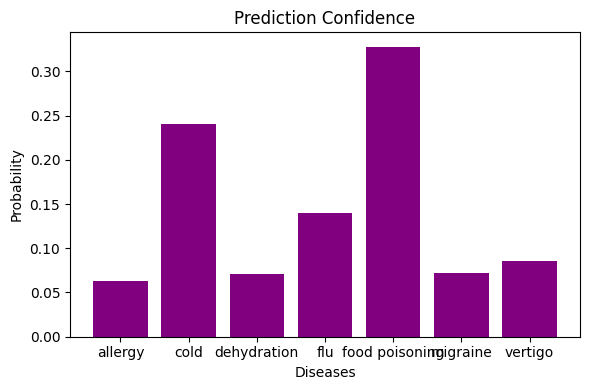

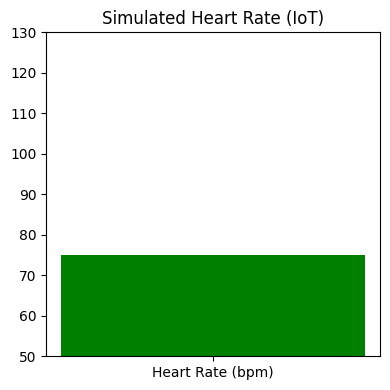

Simulated Heart Rate: 75 bpm


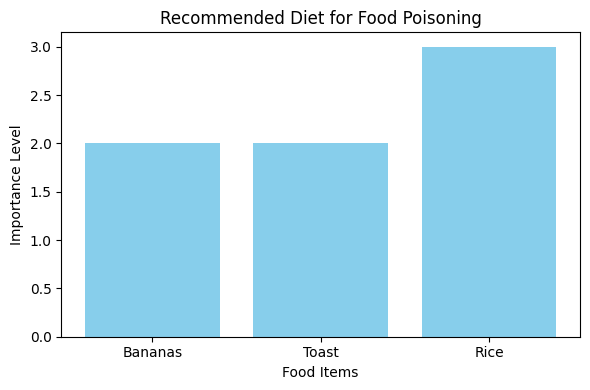


Disclaimer: Please consult a certified doctor for accurate medical guidance.



We value your feedback! Please share your thoughts about this assistant:  improve language


🙏 Thank you for your feedback!


In [4]:
import random
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pyttsx3
from googletrans import Translator
import requests  # To simulate IoT data

# Data Mappings
symptoms_treatment = {
    'fever': 'Take paracetamol and rest.',
    'cough': 'Use cough syrup and drink warm fluids.',
    'headache': 'Take pain relievers and rest in a quiet room.',
    'fatigue': 'Rest and stay hydrated.',
    'nausea': 'Eat light food and stay hydrated.',
    'sore throat': 'Gargle with warm salt water and rest.',
    'dizziness': 'Sit or lie down in a comfortable position.'
}

disease_symptoms = {
    'flu': ['fever', 'cough', 'fatigue'],
    'cold': ['cough', 'headache'],
    'migraine': ['headache', 'nausea'],
    'dehydration': ['fatigue', 'headache', 'nausea'],
    'food poisoning': ['nausea', 'fever'],
    'allergy': ['sore throat', 'cough', 'fatigue'],
    'vertigo': ['dizziness', 'nausea']
}

disease_info = {
    'flu': 'Flu is caused by a virus and spreads easily.',
    'cold': 'Cold causes mild respiratory issues and is viral.',
    'migraine': 'A migraine is a neurological headache disorder.',
    'dehydration': 'Dehydration occurs when you lose more fluids than you take in.',
    'food poisoning': 'Food poisoning is caused by contaminated food.',
    'allergy': 'Allergies are reactions to substances that are harmless to most people.',
    'vertigo': 'Vertigo causes dizziness and a sense of spinning.'
}

diet_chart = {
    'flu': ['Chicken soup', 'Warm fluids', 'Citrus fruits'],
    'cold': ['Ginger tea', 'Honey water', 'Soups'],
    'migraine': ['Magnesium-rich food', 'Dark leafy greens', 'Nuts'],
    'dehydration': ['ORS', 'Coconut water', 'Watery fruits'],
    'food poisoning': ['Bananas', 'Toast', 'Rice'],
    'allergy': ['Green vegetables', 'Citrus fruits', 'Water-rich foods'],
    'vertigo': ['Ginger tea', 'Fruits', 'Hydration']
}

# Model Training
def train_classifier_with_metrics():
    expanded_data = []
    expanded_labels = []
    for disease, symptoms in disease_symptoms.items():
        for _ in range(3):
            random.shuffle(symptoms)
            sample = ", ".join(symptoms)
            expanded_data.append(sample)
            expanded_labels.append(disease)

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(expanded_data)
    X_train, X_test, y_train, y_test = train_test_split(X, expanded_labels, test_size=0.2, random_state=42)

    model = MultinomialNB(alpha=0.5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nImproved Model Accuracy: {acc * 100:.2f}%")
    return model, vectorizer

# Voice Output
def speak(text, lang='en'):
    engine = pyttsx3.init()
    engine.setProperty('rate', 150)
    if lang == 'ta':
        engine.setProperty('voice', 'com.apple.speech.synthesis.voice.kannada')
    elif lang == 'hi':
        engine.setProperty('voice', 'com.apple.speech.synthesis.voice.hindi')
    else:
        engine.setProperty('voice', 'com.apple.speech.synthesis.voice.samantha')
    engine.say(text)
    engine.runAndWait()

# Translation Support
def translate_text(text, lang='ta'):
    translator = Translator()
    translated = translator.translate(text, dest=lang)
    return translated.text

# Fever Graph
def plot_fever_graph(days, temps):
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, days+1), temps, marker='o', color='red')
    plt.title("Fever Temperature Over Days")
    plt.xlabel("Day")
    plt.ylabel("Temperature (°F)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# IoT Heart Rate Simulation (Real Data API Simulation)
def simulate_iot_heart_rate():
    # Mock IoT data (replace with real health band API)
    heart_rate = random.randint(60, 120)
    plt.figure(figsize=(4, 4))
    plt.bar(['Heart Rate (bpm)'], [heart_rate], color='green')
    plt.title("Simulated Heart Rate (IoT)")
    plt.ylim(50, 130)
    plt.tight_layout()
    plt.show()
    print(f"Simulated Heart Rate: {heart_rate} bpm")

# Prediction Confidence Graph
def plot_prediction_confidence(probs, disease_names):
    plt.figure(figsize=(6, 4))
    plt.bar(disease_names, probs, color='purple')
    plt.title("Prediction Confidence")
    plt.xlabel("Diseases")
    plt.ylabel("Probability")
    plt.tight_layout()
    plt.show()

# Diet Recommendation Graph
def plot_diet_chart_graph(disease):
    if disease in diet_chart:
        items = diet_chart[disease]
        values = [random.randint(1, 10) for _ in items]
        plt.figure(figsize=(6, 4))
        plt.bar(items, values, color='skyblue')
        plt.title(f"Recommended Diet for {disease.title()}")
        plt.xlabel("Food Items")
        plt.ylabel("Importance Level")
        plt.tight_layout()
        plt.show()

# Main Assistant Function
def healthcare_assistant(model, vectorizer):
    print("\nWelcome to the Healthcare Assistant")
    name = input("Enter your name: ")
    age = input("Enter your age: ")
    lang = input("Preferred language code (en/ta/hi): ").strip()
    symptoms_input = input("Enter your symptoms (comma-separated): ").lower().split(',')
    symptoms = [s.strip() for s in symptoms_input if s.strip() in symptoms_treatment]

    if not symptoms:
        print("No valid symptoms entered. Please try again.")
        return

    if 'fever' in symptoms:
        try:
            days = int(input("Fever duration in days (1-7): "))
            temps = [float(input(f"Temperature on Day {i+1} (°F): ")) for i in range(days)]
            plot_fever_graph(days, temps)
        except:
            print("Skipping fever graph due to invalid input.")

    symptoms_str = ", ".join(symptoms)
    X = vectorizer.transform([symptoms_str])
    predicted = model.predict(X)[0]
    probs = model.predict_proba(X)[0]
    disease_names = model.classes_

    output = f"{name}, you may have: {predicted.upper()}\n"
    output += f"Info: {disease_info[predicted]}\n"
    output += "\nTreatments:\n" + "\n".join([f"- {s}: {symptoms_treatment[s]}" for s in symptoms])
    output += "\n\nRecommended Diet:\n" + "\n".join([f"- {item}" for item in diet_chart[predicted]])

    print(output)
    speak(output, lang=lang)
    print("\nTranslated Message:")
    print(translate_text(output, lang=lang))

    # Show 3 useful graphs
    plot_prediction_confidence(probs, disease_names)
    simulate_iot_heart_rate()
    plot_diet_chart_graph(predicted)

    print("\nDisclaimer: Please consult a certified doctor for accurate medical guidance.")

    # Feedback Collection
    feedback = input("\nWe value your feedback! Please share your thoughts about this assistant: ")
    print("🙏 Thank you for your feedback!")

# Run Assistant
model, vectorizer = train_classifier_with_metrics()
healthcare_assistant(model, vectorizer)
